In [1]:
#Importing packages

import numpy as np
import pandas as pd
import requests
import glob
import openpyxl
import os
import matplotlib.pyplot as plt
from pandas.plotting import table
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
votes6 = pd.read_csv(os.path.join("Cleaned_data", "EP6_clean_data","wnominate_ep6_votes.csv"))
mep_names6 = pd.read_csv(os.path.join("Cleaned_data", "EP6_clean_data","mep_info_EP_6.csv"))

In [3]:
mep_names6 = mep_names6[["FullName","EPG"]]

In [4]:
votes6['1']

0      1
1      3
2      3
3      3
4      3
      ..
935    0
936    0
937    0
938    0
939    0
Name: 1, Length: 940, dtype: int64

In [5]:
mep_info6 = pd.concat([mep_names6, votes6],axis=1)

In [6]:
def summarize_df(df, n=5):
    if df.shape[0] > 2 * n:
        top_rows = df.head(n)
        bottom_row = df.tail(1)
        ellipsis_row = pd.DataFrame([['...'] * df.shape[1]], columns=df.columns)
        summarized_df = pd.concat([top_rows, ellipsis_row, bottom_row], ignore_index=True)
    else:
        summarized_df = df

    if df.shape[1] > 2 * n:
        first_cols = summarized_df.iloc[:, :n]
        last_col = summarized_df.iloc[:, -1:]
        ellipsis_col = pd.DataFrame([['...']] * summarized_df.shape[0], columns=['...'])
        summarized_df = pd.concat([first_cols, ellipsis_col, last_col], axis=1)
    
    return summarized_df

In [7]:
cartoon_df6 = summarize_df(mep_info6)

In [8]:
cartoon_df6

,FullName,EPG,1,2,3,...,6200
0,Adamos ADAMOU,GUE–NGL,1,1,1,...,3
1,Filip ADWENT,IND/DEM,3,3,3,...,0
2,Vittorio AGNOLETTO,GUE–NGL,3,3,1,...,3
3,Gabriele ALBERTINI,EPP-ED,3,1,1,...,3
4,Jim ALLISTER,NI,3,1,2,...,3
5,...,...,...,...,...,...,...
6,Liene LIEPIŅA,EPP-ED,0,0,0,...,3


In [41]:
def cartoon_making(cartoon_df,number):   
    fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the size as needed
    ax.xaxis.set_visible(False)  # Hide the x-axis
    ax.yaxis.set_visible(False)  # Hide the y-axis
    ax.set_frame_on(False)  # No visible frame
    
    # Create the table without the index
    tbl = table(ax, cartoon_df, loc='center', cellLoc='center', colWidths=[0.2]*cartoon_df.shape[1])
    
    # Remove the index from the table
    tbl.auto_set_column_width([i for i in range(len(cartoon_df.columns))])
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(20)
    tbl.scale(5, 5)  # Set the table scale
    
    # Hide the index
    tbl.scale(5, 1)  # Set the table scale
    for key, cell in tbl.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(weight='bold')
        if key[1] == -1:
            cell.set_visible(False)
    
    # Adjust layout to make room for the title
    plt.subplots_adjust(top=0.5)
    # Save the table as an image
    plt.savefig(os.path.join('Graphs',f'short_table{number}.png'), bbox_inches='tight', dpi=300)
    plt.show()

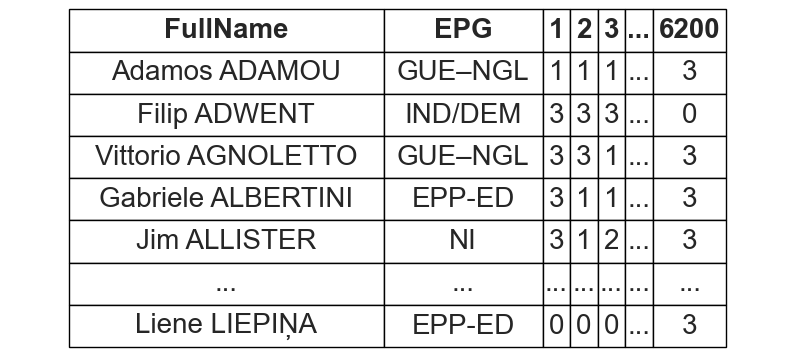

In [42]:
cartoon_making(cartoon_df6,6)

In [43]:
votes9 = pd.read_csv(os.path.join("Cleaned_data", "EP9_clean_data","matrix_ep9_votes.csv"))
mep_names9 = pd.read_csv(os.path.join("Cleaned_data", "EP9_clean_data","mep_info_for_wnominate.csv"))

In [44]:
votes9 = votes9.fillna(0)
votes9 = votes9.astype(int)
votes9 = votes9.iloc[:,1:]

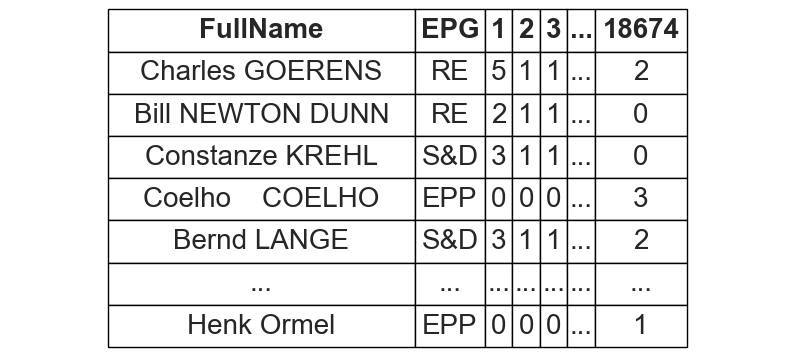

In [45]:
mep_names9 = mep_names9[["FullName","EPG"]]
mep_info9 = pd.concat([mep_names9, votes9],axis=1)
cartoon_df9 = summarize_df(mep_info9)
cartoon_making(cartoon_df9,9)

In [46]:
votes7 = pd.read_csv(os.path.join("Cleaned_data", "EP7_clean_data","matrix_ep7_votes.csv"))
mep_names7 = pd.read_csv(os.path.join("Cleaned_data", "EP7_clean_data","mep_info_for_wnominate.csv"))

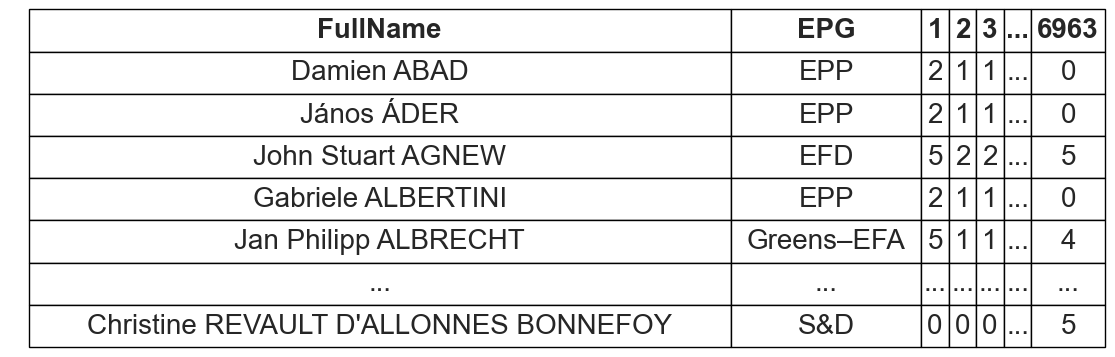

In [47]:
mep_names7 = mep_names7[["FullName","EPG"]]
mep_info7 = pd.concat([mep_names7, votes7],axis=1)
cartoon_df7 = summarize_df(mep_info7)
cartoon_making(cartoon_df7,7)

In [48]:
votes8 = pd.read_csv(os.path.join("Cleaned_data", "EP8_clean_data","matrix_ep8_votes.csv"))
mep_names8 = pd.read_csv(os.path.join("Cleaned_data", "EP8_clean_data","mep_info_for_wnominate.csv"))

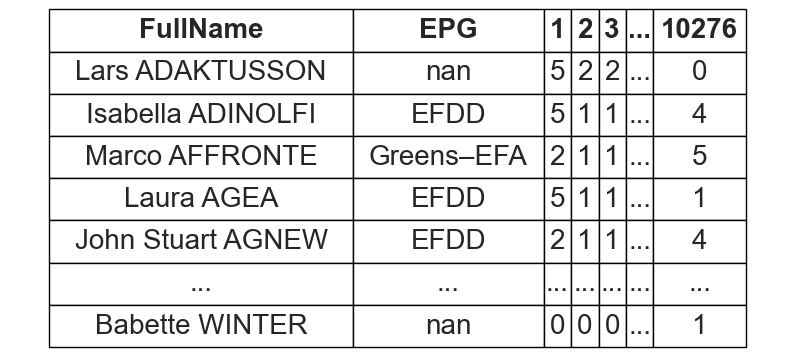

In [49]:
mep_names8 = mep_names8[["FullName","EPG"]]
mep_info8 = pd.concat([mep_names8, votes8],axis=1)
cartoon_df8 = summarize_df(mep_info8)
cartoon_making(cartoon_df8,8)

In [50]:
def get_numbers(df):
    datapoints = df.shape[0]*df.shape[1]
    rollcalls = df.shape[1]
    meps = df.shape[0]
    return datapoints, rollcalls, meps

In [51]:
get_numbers(votes7)

(5937733, 6961, 853)

In [52]:
get_numbers(votes8)

(8796216, 10252, 858)

In [53]:
get_numbers(votes9)

(16171684, 18674, 866)

In [54]:
get_numbers(votes6)

(5827060, 6199, 940)

In [55]:
data = {
    'EP': ["EP6", "EP7", "EP8","EP9"],
    'Datapoints': [5827060,5937733, 8796216, 16171684],
    'rollcalls': [6199, 6961, 10252,18674],
    'meps': [940,853,858,866]
}

In [56]:
funtable = pd.DataFrame(data)

In [57]:
def format_func(value, tick_number):
    return f'{value * 1e-6:.1f}M'

In [76]:
def fun(df):
    plt.figure(figsize=(15, 15), facecolor='none')  # Set facecolor to None for transparency

    # Create a white grid with black lines
    ax = plt.gca()
    ax.set_axisbelow(True)

    plt.plot(df['EP'], df['Datapoints'], marker='o', linestyle='-', color='#000000', label='Datapoints')

    for i, txt in enumerate(df['Datapoints']):
        plt.annotate(txt, (df['EP'][i], df['Datapoints'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color='#000000' ,bbox=dict(boxstyle="square", facecolor="#CCCCCC", edgecolor="#CCCCCC"), alpha=1)

    # Set black lines and labels for plot elements
    ax.spines['bottom'].set_color('#000000')
    ax.spines['top'].set_color('#000000')
    ax.spines['right'].set_color('#000000')
    ax.spines['left'].set_color('#000000')

    ax.tick_params(axis='x', colors='#000000', labelsize=25)  # Set tick labels to size 25
    ax.tick_params(axis='y', colors='#000000', labelsize=25)

    plt.xlabel('EP', fontsize=25, color='#000000')
    plt.ylabel('Number of Datapoints in millions', fontsize=25, color='#000000')
    plt.legend(fontsize=25, labelcolor='#000000')

    ax.grid(True, linestyle='-', axis='both', which='major', color='#000000', linewidth=2)
    ax.tick_params(axis='x', which='both', top=True, bottom=True, left=False, right=False)
    ax.tick_params(axis='y', which='both', top=True, bottom=True, left=False, right=False)

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_func))

    # Save the plot to a PNG file with transparent background
    plt.savefig(os.path.join('Graphs','Datapoints.png'), bbox_inches='tight', dpi=300, transparent=True)
    plt.show()


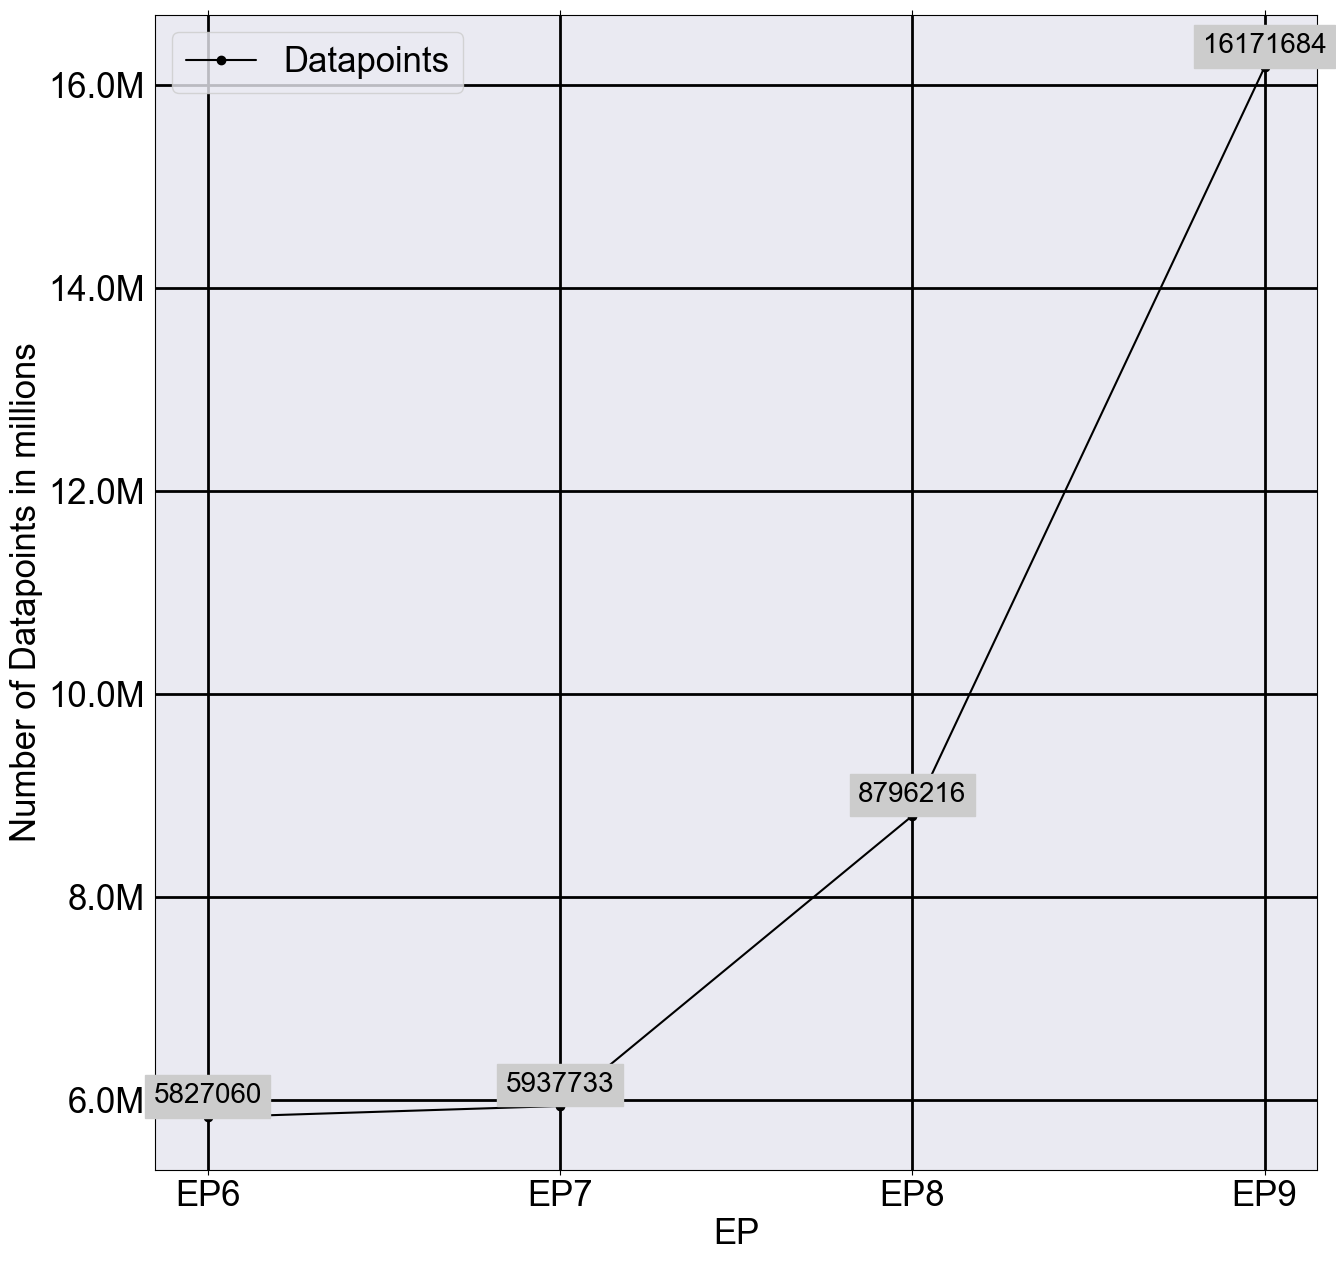

In [77]:
fun(funtable)

In [34]:
def more_fun(df):
    plt.figure(figsize=(15, 15))
    plt.plot(df['EP'], df['rollcalls'], marker='o', color='orange', label='Rollcalls')
    for i, txt in enumerate(df['rollcalls']):
        plt.annotate(txt, (df['EP'][i], df['rollcalls'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=15)
    plt.xlabel('EP', fontsize=14)
    plt.ylabel('Number of Rollcalls', fontsize=14)
    plt.title('Number of Rollcalls by EP', fontsize=25)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


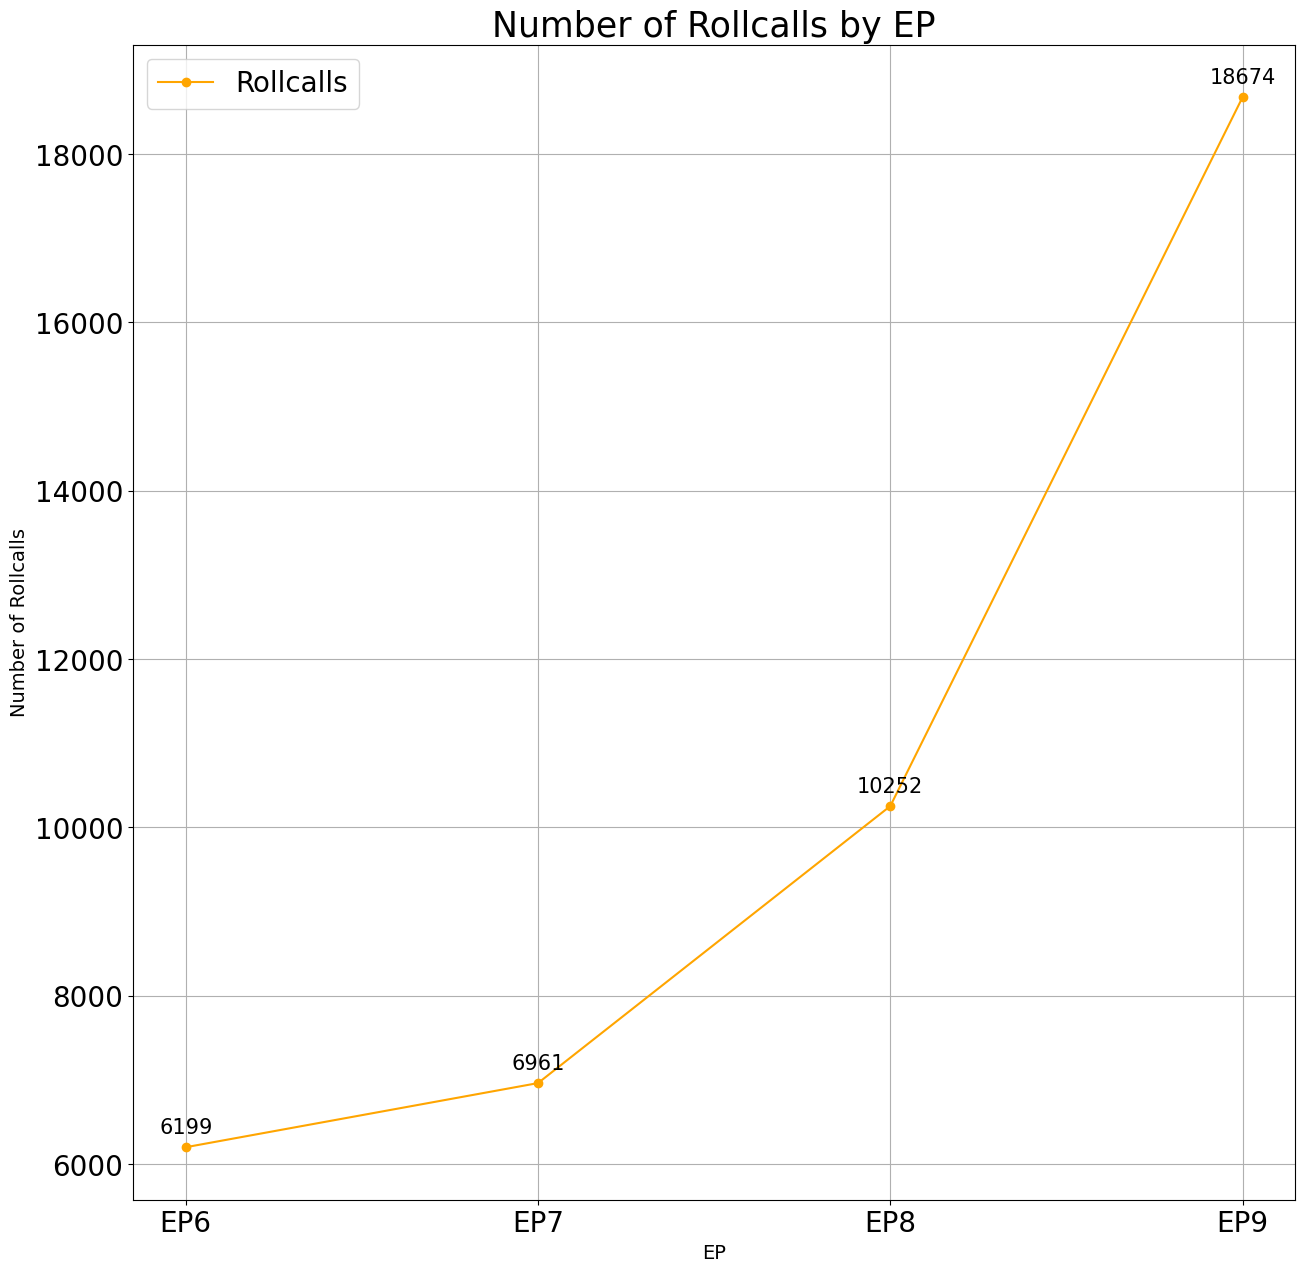

In [100]:
more_fun(funtable)

In [101]:
legislators = pd.read_csv(os.path.join("Results","EP6_1D_Ideal_points_WNOMINATE_Iteration1.csv"))

In [106]:
legislators['y'] = 0

In [111]:
def wnominate (df):    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='coord1D', y='coord2D', hue='EPG', s=100)
    
    # Set labels and title
    plt.title(f"W Nominate 2D - Iteration {1}")  # Replace 1 with your iteration variable
    plt.xlabel("Coordinate 1D")
    plt.ylabel("Coordinate 2D")
    
    # Apply minimal theme
    sns.set(style="whitegrid")
    
    # Add legend
    plt.legend(title='EPG Labels', loc='best')
    
    # Show plot
    plt.show()

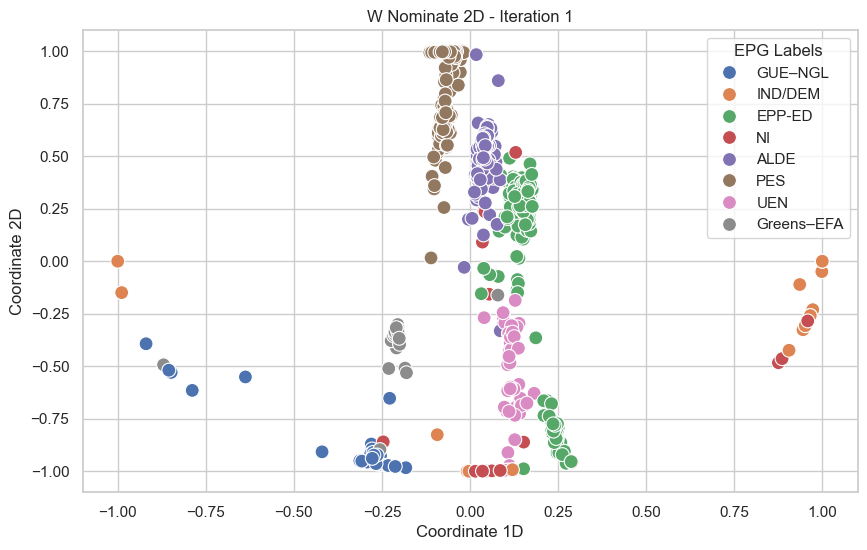

In [112]:
wnominate(legislators)